In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as data
from datetime import datetime
from alpha_vantage.timeseries import TimeSeries


In [13]:
# Your Alpha Vantage API Key (replace with your actual API key)
api_key = 'your_alpha_vantage_api_key'

# Create a TimeSeries object
ts = TimeSeries(key=api_key, output_format='pandas')

# Fetch the stock data (daily data for AAPL)
try:
    data, meta_data = ts.get_daily(symbol='AAPL', outputsize='full')
    
    # Check if the data was returned properly
    if data.empty:
        print("No data fetched for the given symbol.")
    else:
        print(data.tail())
        
except Exception as e:
    print(f"An error occurred: {e}")


            1. open  2. high  3. low  4. close  5. volume
date                                                     
1999-11-05    84.62    88.37   84.00     88.31  3721500.0
1999-11-04    82.06    85.37   80.62     83.62  3384700.0
1999-11-03    81.62    83.25   81.00     81.50  2932700.0
1999-11-02    78.00    81.69   77.31     80.25  3564600.0
1999-11-01    80.00    80.69   77.37     77.62  2487300.0


In [14]:
print(data.tail())

            1. open  2. high  3. low  4. close  5. volume
date                                                     
1999-11-05    84.62    88.37   84.00     88.31  3721500.0
1999-11-04    82.06    85.37   80.62     83.62  3384700.0
1999-11-03    81.62    83.25   81.00     81.50  2932700.0
1999-11-02    78.00    81.69   77.31     80.25  3564600.0
1999-11-01    80.00    80.69   77.37     77.62  2487300.0


In [15]:
df = data.reset_index()
print(df.head())


        date  1. open  2. high    3. low  4. close   5. volume
0 2025-02-21   245.95   248.69  245.2200    245.55  53197431.0
1 2025-02-20   244.94   246.78  244.2900    245.83  32316907.0
2 2025-02-19   244.66   246.01  243.1604    244.87  32204215.0
3 2025-02-18   244.15   245.18  241.8400    244.47  48822491.0
4 2025-02-14   241.25   245.55  240.9900    244.60  40896227.0


In [19]:
# Rename columns to remove extra spaces and make them more readable
data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Drop the 'Volume' column
df = data.drop(columns=['Volume'])

# Display the updated DataFrame
print(df.head())



              Open    High       Low   Close
date                                        
2025-02-21  245.95  248.69  245.2200  245.55
2025-02-20  244.94  246.78  244.2900  245.83
2025-02-19  244.66  246.01  243.1604  244.87
2025-02-18  244.15  245.18  241.8400  244.47
2025-02-14  241.25  245.55  240.9900  244.60


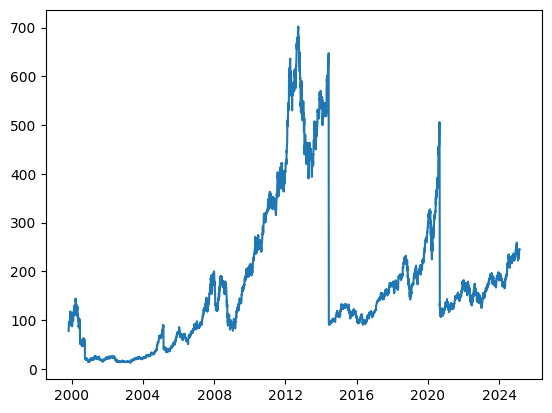

In [21]:
plt.plot(df.Close)

In [23]:
df

,Open,High,Low,Close
date,,,,
2025-02-21,245.95,248.69,245.2200,245.55
2025-02-20,244.94,246.78,244.2900,245.83
2025-02-19,244.66,246.01,243.1604,244.87
2025-02-18,244.15,245.18,241.8400,244.47
2025-02-14,241.25,245.55,240.9900,244.60
...,...,...,...,...
1999-11-05,84.62,88.37,84.0000,88.31
1999-11-04,82.06,85.37,80.6200,83.62
1999-11-03,81.62,83.25,81.0000,81.50


In [25]:
ma100 = df.Close.rolling(100).mean()
ma100


date
2025-02-21         NaN
2025-02-20         NaN
2025-02-19         NaN
2025-02-18         NaN
2025-02-14         NaN
                ...   
1999-11-05    108.3587
1999-11-04    107.8355
1999-11-03    107.2592
1999-11-02    106.6661
1999-11-01    106.0554
Name: Close, Length: 6366, dtype: float64

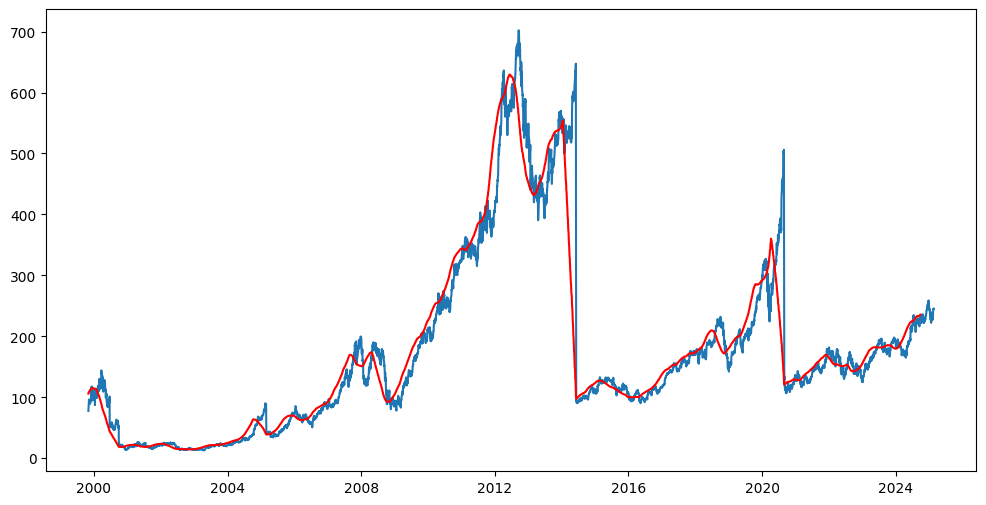

In [27]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')


In [29]:
ma200 = df.Close.rolling(200).mean()
ma200


date
2025-02-21         NaN
2025-02-20         NaN
2025-02-19         NaN
2025-02-18         NaN
2025-02-14         NaN
                ...   
1999-11-05    95.94265
1999-11-04    96.10825
1999-11-03    96.26575
1999-11-02    96.40980
1999-11-01    96.55540
Name: Close, Length: 6366, dtype: float64

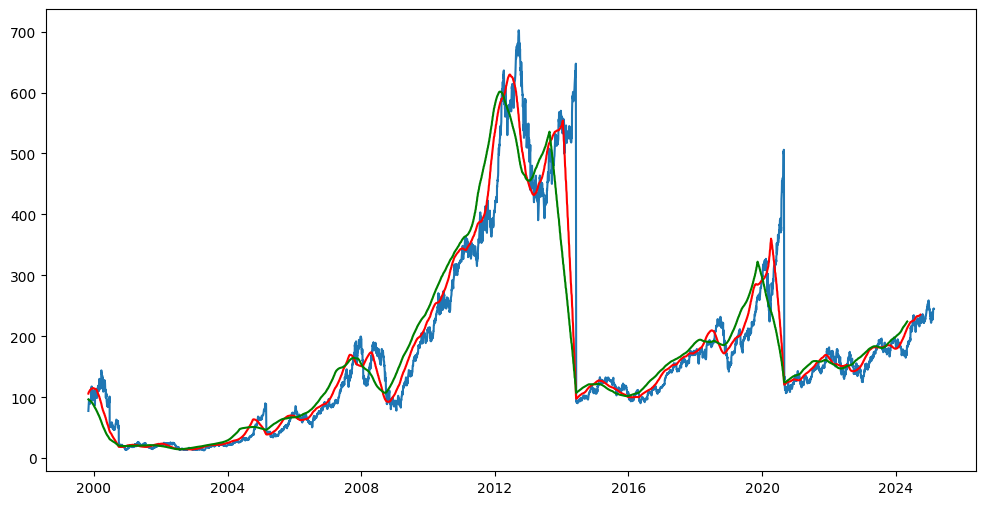

In [31]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')


In [33]:
df.shape

(6366, 4)

In [35]:
#Spliting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape) 



(4456, 1)
(1910, 1)


In [37]:
data_training.head()

,Close
date,
2025-02-21,245.55
2025-02-20,245.83
2025-02-19,244.87
2025-02-18,244.47
2025-02-14,244.60


In [39]:
data_testing.head()

,Close
date,
2007-06-07,124.069
2007-06-06,123.640
2007-06-05,122.670
2007-06-04,121.330
2007-06-01,118.400


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [43]:
data_training_array= scaler.fit_transform(data_training)
data_training_array





array([[0.26823209],
       [0.26868088],
       [0.26714217],
       ...,
       [0.06760699],
       [0.06730245],
       [0.07419458]])

In [45]:
print(data_training_array.shape)

(4456, 1)


In [47]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train= np.array(x_train), np.array(y_train)

In [49]:
print(x_train.shape)

(4356, 100, 1)


In [51]:
#Ml Model




In [53]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input

# Define the model
model = Sequential()

# Add the Input layer (first layer specifying the shape of the input)
model.add(Input(shape=(x_train.shape[1], 1)))

# Add the first LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

# Add the second LSTM layer
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Add the third LSTM layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Add the fourth LSTM layer
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(units=1))


In [55]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

None


In [57]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model (make sure x_train and y_train are properly defined)
model.fit(x_train, y_train, epochs=50)


Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 44s 254ms/step - loss: 0.0295
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 43s 271ms/step - loss: 0.0058
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 263ms/step - loss: 0.0045
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 259ms/step - loss: 0.0030
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 43s 272ms/step - loss: 0.0030
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 262ms/step - loss: 0.0031
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 268ms/step - loss: 0.0032
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 262ms/step - loss: 0.0029
Epoch 9/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 272ms/step - loss: 0.0029
Epoch 10/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 232ms/step - loss: 0.0021
Epoch 11/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 31s 225ms/step - loss: 0.0031
Epoch 12/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 268ms/step - loss: 0.0024
Epoch 13/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 262ms/step - loss: 0.0025
Epoch 14/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 259ms/step - loss: 0.0025
Epoch 15/50
137

In [59]:
# Save the trained model 
model.save('keras_model.keras')


In [61]:
data_testing.head()

,Close
date,
2007-06-07,124.069
2007-06-06,123.640
2007-06-05,122.670
2007-06-04,121.330
2007-06-01,118.400


In [63]:
data_training.tail(100)

,Close
date,
2007-10-29,185.09
2007-10-26,184.70
2007-10-25,182.78
2007-10-24,185.93
2007-10-23,186.16
...,...
2007-06-14,118.75
2007-06-13,117.50
2007-06-12,120.38


In [65]:
past_100_days = data_training.tail(100)

In [67]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [69]:
final_df.head()

,Close
0,185.09
1,184.70
2,182.78
3,185.93
4,186.16


In [71]:
input_data = scaler.fit_transform(final_df)
print(input_data)

[[0.99381646]
 [0.99156264]
 [0.98046694]
 ...
 [0.39516875]
 [0.38794498]
 [0.37274619]]


In [73]:
input_data.shape

(2010, 1)

In [75]:
x_test=[]
y_test=[]
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    

In [77]:
x_test, y_test= np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1910, 100, 1)
(1910,)


In [79]:
#Marking prediction

y_predicted = model.predict(x_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step


In [81]:
y_predicted.shape

(1910, 1)

In [83]:
y_test

array([0.64117545, 0.63869626, 0.63309061, ..., 0.39516875, 0.38794498,
       0.37274619])

In [85]:
y_predicted

array([[0.50451726],
       [0.5112409 ],
       [0.5133388 ],
       ...,
       [0.35404515],
       [0.3441804 ],
       [0.33338553]], dtype=float32)

In [87]:
scaler.scale_

array([0.00577901])

In [89]:
scale_factor = 1/0.02134523
y_predicted = y_predicted * scale_factor
y_test = y_test* scale_factor

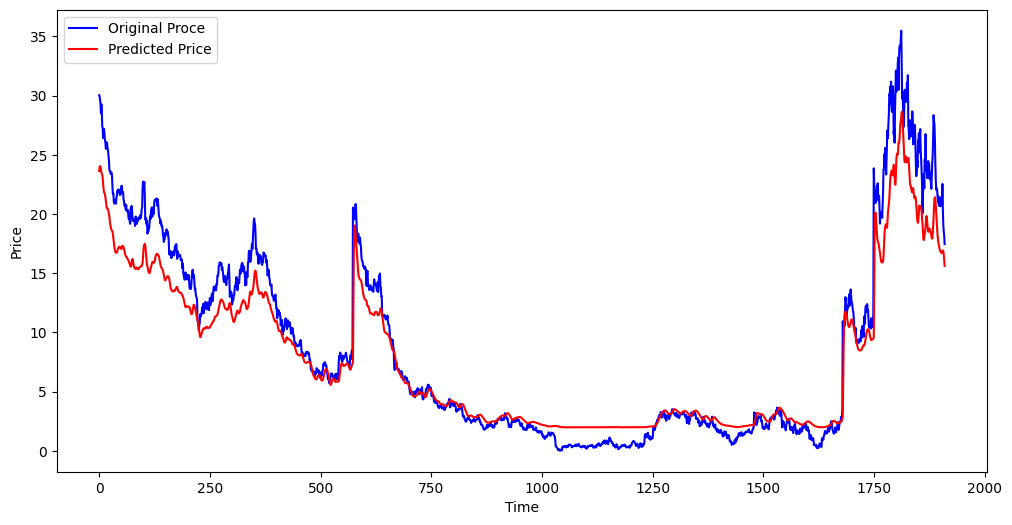

In [91]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label = 'Original Proce')
plt.plot(y_predicted, 'r' , label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()